# Clustering

Clustering is an unsupervized learning technique where you take the entire dataset and find the "groups of similar entities" within the dataset. Hence there is no labels within the dataset.

Useful for organizing very large dataset into meaningful clusters that can be useful and actions can be taken upon. For example, take entire customer base of more than 1M records and try to group into high value customers, low value customers and so on.


This example covers

- Generating a synthetic dataset using `sklearn.datasets.make_blobs`
- Visualizing data before and after clustering
- Implementing `K-Means` from scratch
- Comparing with `Scikit-learn`'s `KMeans`

## Generate and Visualize the Dataset
Create a dataset using `make_blobs`

For testing purpose we will generate the synthetic dataset with three clusters


In [70]:
#!pip install scikit-learn

In [71]:
#import and load dataset
from sklearn.datasets import make_blobs


In [72]:
# Synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

In [73]:
X

array([[-7.33898809, -7.72995396],
       [-7.74004056, -7.26466514],
       [-1.68665271,  7.79344248],
       [ 4.42219763,  3.07194654],
       [-8.91775173, -7.8881959 ],
       [ 5.49753846,  1.81323115],
       [-2.3360167 ,  9.39960351],
       [ 5.05281029,  1.40944513],
       [-2.98837186,  8.82862715],
       [-3.70050112,  9.67083974],
       [-3.11090424, 10.86656431],
       [ 4.99689432,  1.28026009],
       [-2.30033403,  7.054616  ],
       [-3.92456837,  8.59364081],
       [-7.53026976, -7.36723498],
       [-3.21125072,  8.68662398],
       [-8.50716963, -6.83202465],
       [ 2.61473625,  2.159624  ],
       [-2.41212007,  9.98293112],
       [-1.92234053, 11.20474175],
       [-1.35060204,  8.19360381],
       [-2.67048333,  9.41833699],
       [ 5.61499857,  1.8261123 ],
       [-6.99195524, -7.10107919],
       [-2.97261532,  8.54855637],
       [-6.34982301, -5.43854097],
       [-7.45639852, -6.12471837],
       [ 3.82165815,  4.06555696],
       [ 4.62763206,

Plot the data

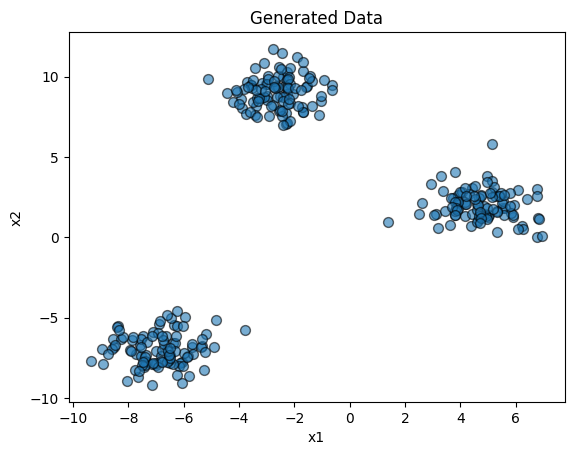

In [74]:
import matplotlib.pyplot as plt


# Plot the raw data points
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6, edgecolors='k')
plt.title("Generated Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Implement K-Means

1. Initialize KK cluster centroids randomly.
2. Assign each data point to the nearest centroid.
3. Recalculate centroids as the mean of assigned points.
4. Repeat steps 2 and 3 until convergence (centroids stop changing or `max limit` of iterations reached).


The `KMeans` class implements the **K-Means clustering algorithm from scratch**.

It groups data points into `k` clusters by iteratively updating cluster centroids based on the Euclidean distance between points and centroids.  

#### Class Attributes
- `k`  Number of clusters.  
- `max_iters`  Maximum number of iterations for convergence.  
- `tol` Threshold for stopping when centroid changes are minimal.  
- `centroids` Stores the cluster centroids.  
- `labels_`  Stores cluster assignments for each data point.  


#### Functions



*`__init__(self, k=3, max_iters=100, tol=1e-4)`*

Initializes the number of clusters, max iterations, and tolerance for stopping

**Parameters**:  
   - `k`: Number of clusters (default: `3`).  
   - `max_iters`: Maximum iterations for convergence (default: `100`).  
   - `tol`: Convergence threshold for centroid movement (default: `1e-4`).  
**Returns**: Nothing (only initializes instance variables).  


*`fit(self, X)`*

Trains the K-Means model by assigning points to clusters and updating centroids

**Steps**:  
1. **Initialize centroids randomly** from `X` using `np.random.choice()`.  
2. **Repeat for `max_iters` iterations**:  
   - Compute the **Euclidean distance** between each data point and all centroids.  
   - Assign each point to the **nearest** centroid.  
   - Compute **new centroids** as the mean of assigned points.  
   - **Check for convergence**: Stop if centroids do not change significantly.  
3. **Store the final labels** of each data point in `self.labels_`.  
**Returns**: Updates `self.centroids` and `self.labels_`.  


*`predict(self, X)`*

Assigns new data points to the nearest centroid (prediction step)

**Steps**:  
1. Compute the **Euclidean distance** between `X` and centroids.  
2. Assign each point to the **nearest centroid** using `argmin()`.  
**Returns**: An array of cluster labels for input `X`.


### Implementation

In [75]:
import numpy as np

class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        np.random.seed(11)
        # Randomly initialize k centroids
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        # iterate upto max_iters
        for _ in range(self.max_iters):

            # Compute distances from each point to centroids
            distances = np.linalg.norm(X[:,np.newaxis] - self.centroids, axis = 2)
            labels = np.argmin(distances, axis=1)
            # print(labels)
            
            # Compute new centroids
            new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(self.k)])
            # print(new_centroids)
                        
            # Check for convergence (if centroids don't change much)
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break
            # update the controid
            self.centroids = new_centroids
        
        self.labels_ = labels

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

## Train the Model

In [76]:
# Train the custom K-Means model
kmeans = KMeans(k=3)
kmeans.fit(X)

## Visualize the clusters

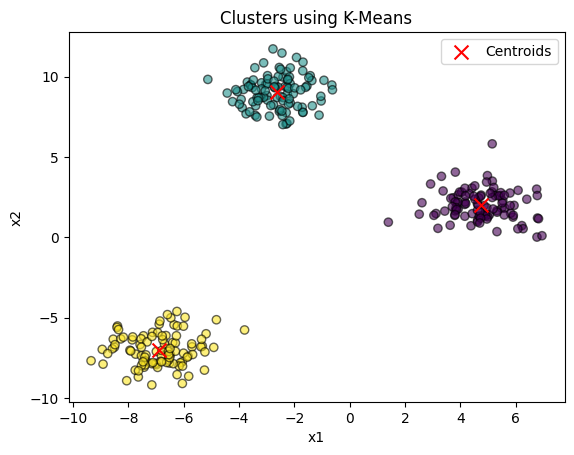

In [77]:
# Plot clustered data
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=0.6, edgecolors='k')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=100, label="Centroids")
plt.title("Clusters using K-Means")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

## Working beyound 2 dimentions

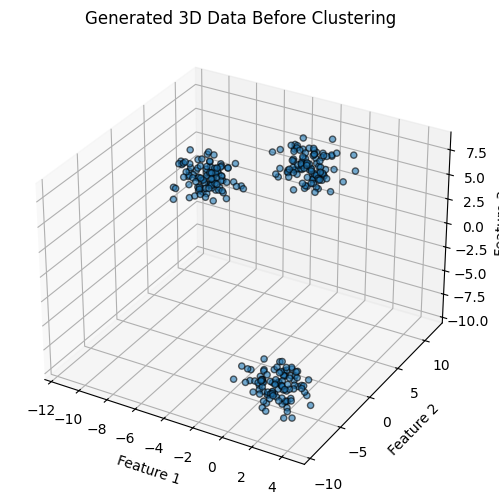

In [78]:
from mpl_toolkits.mplot3d import Axes3D

# Generate a 3D dataset with 300 samples and 3 clusters
X, _ = make_blobs(n_samples=300, n_features=3, random_state=42, centers=3, cluster_std=1.0)

# Plot the generated data in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=20, alpha=0.6, edgecolors='k')
ax.set_title("Generated 3D Data Before Clustering")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()


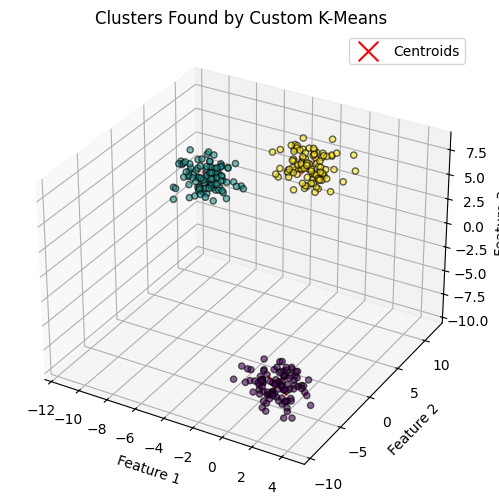

In [79]:
# Train the K-Means model
kmeans = KMeans(k=3)
kmeans.fit(X)

# Plot clustered data in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_, cmap='viridis', alpha=0.6, edgecolors='k')
ax.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], kmeans.centroids[:, 2],
           c='red', marker='x', s=200, label="Centroids")
ax.set_title("Clusters Found by Custom K-Means")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.legend()
plt.show()

In [80]:
# Generate a 4D dataset with 300 samples and 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, n_features=4, cluster_std=1.0, random_state=42)

# Display first 5 rows to check data
print("First 5 samples of 4D data:\n", X[:5])


# Train the K-Means model
kmeans = KMeans(k=3)
kmeans.fit(X)

First 5 samples of 4D data:
 [[  0.74199584   5.03390888  -8.93810894   9.29902118]
 [ -1.651538     8.8543476    4.62086263   0.97064032]
 [  2.12650134   4.09885843 -10.3422747    9.11752197]
 [ -6.40064737  -6.54644749  -7.80078781   6.81350652]
 [  3.07185295   3.62621634  -8.27091605   9.59579665]]


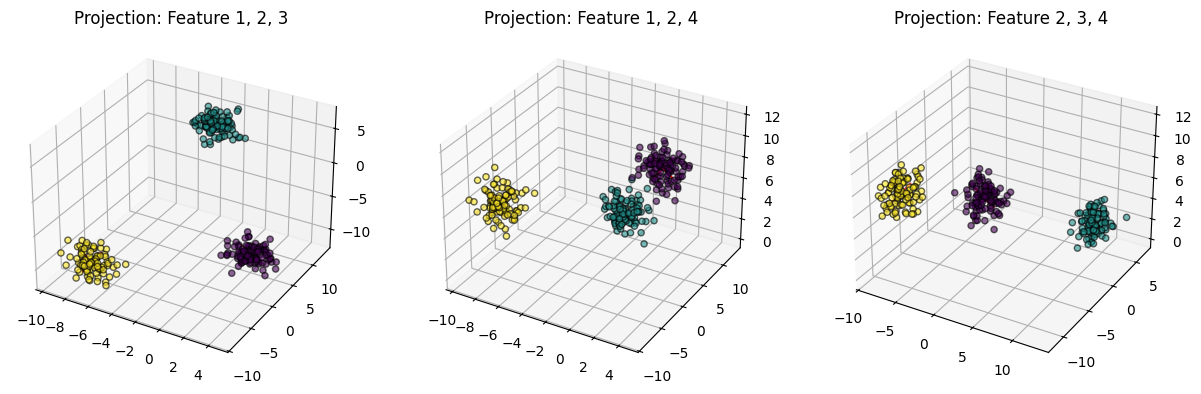

In [81]:
# Create pairwise 3D scatter plots for different feature combinations
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_, cmap='viridis', alpha=0.6, edgecolors='k')
ax1.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], kmeans.centroids[:, 2],
            c='red', marker='x', s=200, label="Centroids")
ax1.set_title("Projection: Feature 1, 2, 3")

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 3], c=kmeans.labels_, cmap='viridis', alpha=0.6, edgecolors='k')
ax2.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], kmeans.centroids[:, 3],
            c='red', marker='x', s=200, label="Centroids")
ax2.set_title("Projection: Feature 1, 2, 4")

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X[:, 1], X[:, 2], X[:, 3], c=kmeans.labels_, cmap='viridis', alpha=0.6, edgecolors='k')
ax3.scatter(kmeans.centroids[:, 1], kmeans.centroids[:, 2], kmeans.centroids[:, 3],
            c='red', marker='x', s=200, label="Centroids")
ax3.set_title("Projection: Feature 2, 3, 4")

plt.show()

## Using Scikit-Learn

Documentation: https://scikit-learn.org/1.6/modules/generated/sklearn.cluster.KMeans.html

```
class sklearn.cluster.KMeans(
    n_clusters=8, *,
    init='k-means++',
    n_init='auto',
    max_iter=300, tol=0.0001, verbose=0,
    random_state=None, copy_x=True, algorithm='lloyd'
)
```
**n_clusters** int, default=8

    The number of clusters to form as well as the number of centroids to generate

**Method for initialization: `init`**
- ‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.

- ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.

- If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

- If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.


In [82]:
from sklearn.cluster import KMeans as SklearnKMeans

In [83]:
sk_kmeans = SklearnKMeans(n_clusters=3, random_state=42, n_init=10)

sk_kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

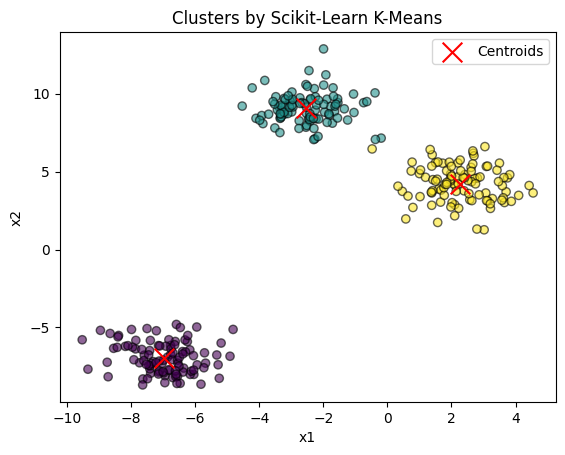

In [84]:
plt.scatter(X[:, 0], X[:, 1], c=sk_kmeans.labels_, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(sk_kmeans.cluster_centers_[:, 0], sk_kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=200, label="Centroids")
plt.title("Clusters by Scikit-Learn K-Means")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()